In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
data = pd.read_csv("wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [3]:
data.value_counts("quality")

quality
good    855
bad     744
Name: count, dtype: int64

In [4]:
X = data.drop(columns=["quality"])
y = data["quality"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [8]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = clf.predict(X_test)

In [10]:
y_pred

array(['bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad',
       'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad',
       'bad', 'good', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'bad', 'go

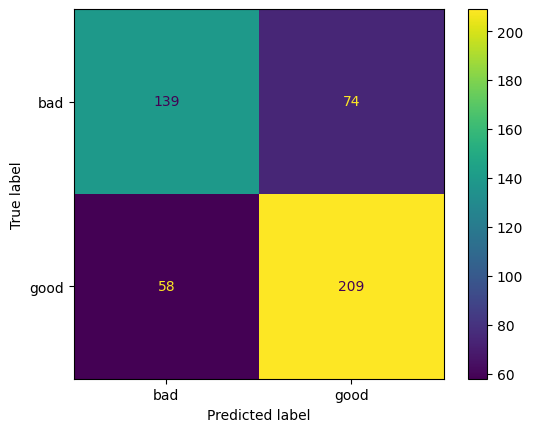

In [11]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [12]:

accuracy_score(y_test, y_pred)

0.725

In [13]:
precision_score(y_test, y_pred, pos_label="good")

0.7385159010600707

In [14]:

209 / (209 + 74)

0.7385159010600707

In [15]:
recall_score(y_test, y_pred, pos_label="good")

0.7827715355805244

In [16]:
209 / (209 + 58)

0.7827715355805244

In [17]:
ks = range(1, 31, 2)
accuracy_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

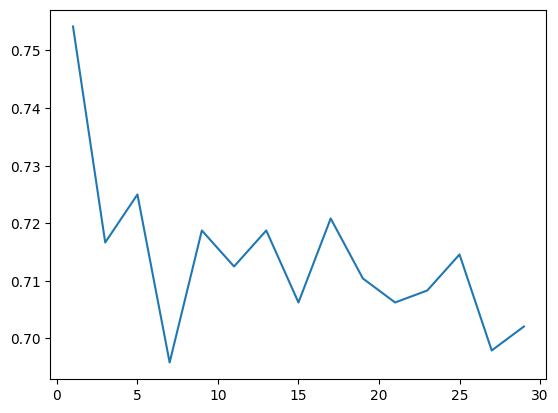

In [18]:

plt.plot(ks, accuracy_scores)

In [19]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7541666666666667

In [20]:
data_test = pd.DataFrame(X_test, columns=X.columns)
data_test["quality_prediction"] = y_pred
data_test["quality_actual"] = y_test.reset_index(drop=True)
data_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_prediction,quality_actual
0,-0.355817,0.147673,-0.973624,-0.033846,0.557887,-0.187023,-0.029268,0.175052,-0.482562,0.006852,-0.771598,bad,good
1,-0.297445,-0.182105,-0.513040,-0.664499,-0.121204,0.494668,1.666575,-0.422949,0.492026,-1.038657,-0.866002,bad,bad
2,1.395361,0.752267,-0.257160,0.106299,0.409335,0.105130,-0.392663,1.969054,-0.222672,1.865534,-0.488387,good,good
3,0.111164,-0.401957,0.203423,-0.209028,-0.206090,1.565897,0.334127,0.664325,0.102191,-0.690154,-0.582790,bad,bad
4,-0.939543,-0.401957,-0.154809,-0.594427,-0.227312,0.202514,-0.392663,-1.075313,0.492026,-0.341651,0.172441,good,good


In [21]:
def compare_values(row):
    if row["quality_prediction"] == row["quality_actual"]:
        return "correct"
    else:
        return "incorrect"


data_test["result"] = data_test.apply(compare_values, axis=1)
data_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_prediction,quality_actual,result
0,-0.355817,0.147673,-0.973624,-0.033846,0.557887,-0.187023,-0.029268,0.175052,-0.482562,0.006852,-0.771598,bad,good,incorrect
1,-0.297445,-0.182105,-0.513040,-0.664499,-0.121204,0.494668,1.666575,-0.422949,0.492026,-1.038657,-0.866002,bad,bad,correct
2,1.395361,0.752267,-0.257160,0.106299,0.409335,0.105130,-0.392663,1.969054,-0.222672,1.865534,-0.488387,good,good,correct
3,0.111164,-0.401957,0.203423,-0.209028,-0.206090,1.565897,0.334127,0.664325,0.102191,-0.690154,-0.582790,bad,bad,correct
4,-0.939543,-0.401957,-0.154809,-0.594427,-0.227312,0.202514,-0.392663,-1.075313,0.492026,-0.341651,0.172441,good,good,correct


In [22]:
data_test_incorrect = data_test[data_test["result"] == "incorrect"]
data_test_incorrect.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_prediction,quality_actual,result
0,-0.355817,0.147673,-0.973624,-0.033846,0.557887,-0.187023,-0.029268,0.175052,-0.482562,0.006852,-0.771598,bad,good,incorrect
8,-0.063954,-0.786699,0.561655,-0.734572,-0.630522,-0.576561,-0.544078,-0.314221,-0.352617,0.471522,-0.582790,good,bad,incorrect
11,-0.939543,1.246935,-1.280680,-0.524354,-0.206090,-0.966099,-1.058887,-0.422949,1.531587,-0.167400,-0.441185,good,bad,incorrect
12,-0.939543,-0.292031,-0.973624,-0.314137,-0.503192,0.202514,-0.392663,-0.683894,0.102191,-0.109316,-0.677194,good,bad,incorrect
14,-0.297445,-1.061514,0.510479,-0.384209,-0.121204,0.786821,0.334127,-0.205494,0.167164,-0.399735,-0.960406,bad,good,incorrect
